### data最好从evaluate的评估结果中自动读取

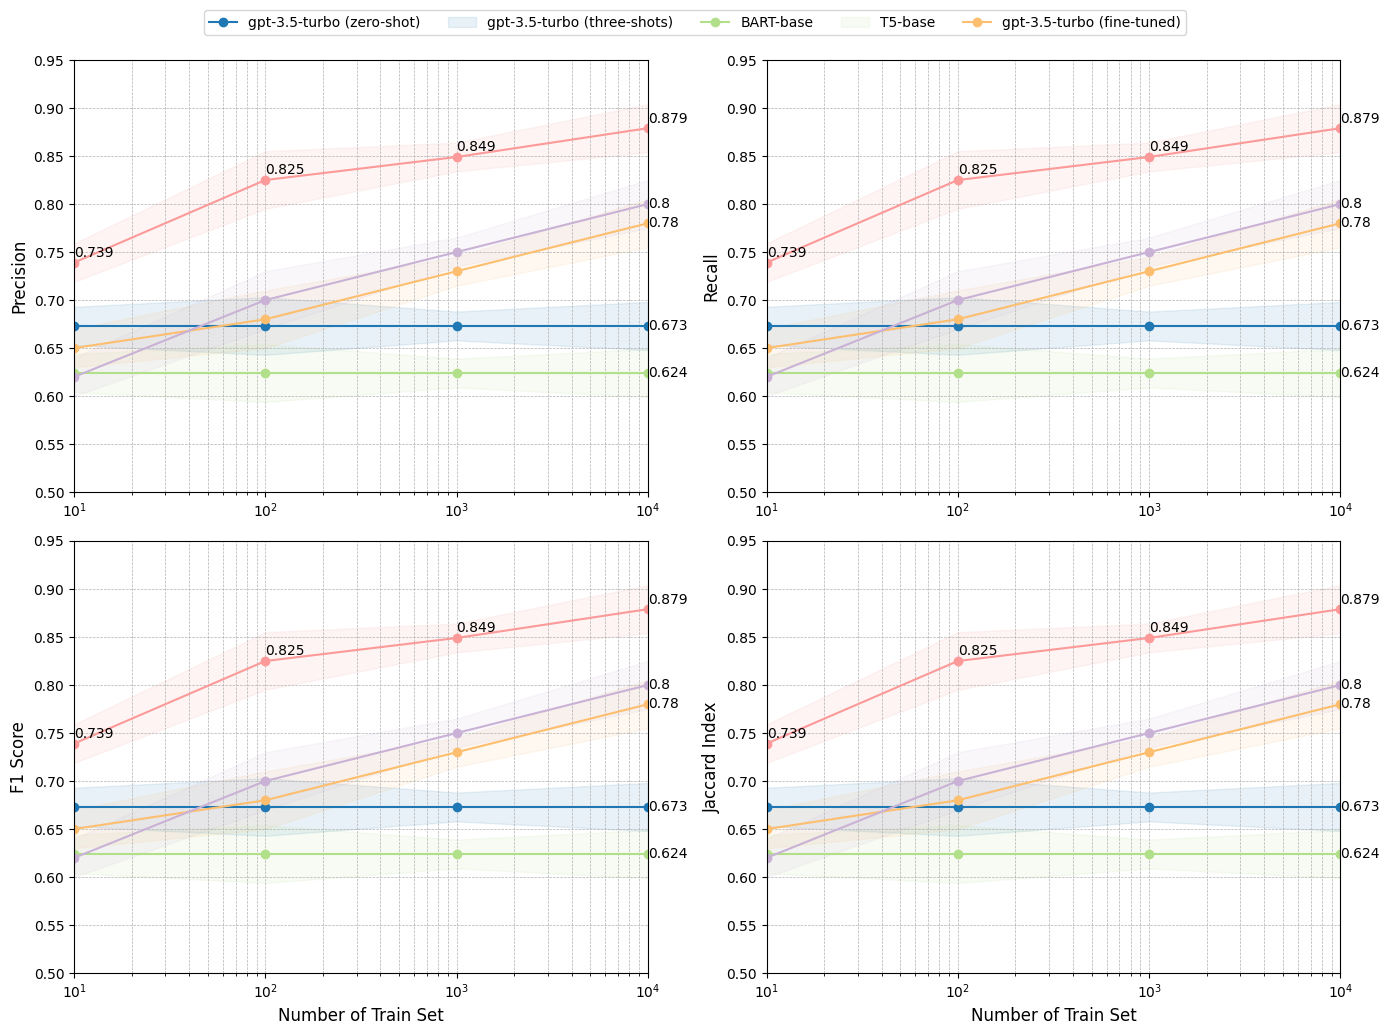

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 用于4个指标的模拟数据。实际上你需要为每个指标有不同的数据
data = [
    [[0.673, 0.673, 0.673, 0.673], 
     [0.624, 0.624, 0.624, 0.624], 
     [0.65, 0.68, 0.73, 0.78], 
     [0.62, 0.7, 0.75, 0.8], 
     [0.739, 0.825, 0.849, 0.879]],
    
    [[0.673, 0.673, 0.673, 0.673], 
     [0.624, 0.624, 0.624, 0.624], 
     [0.65, 0.68, 0.73, 0.78], 
     [0.62, 0.7, 0.75, 0.8], 
     [0.739, 0.825, 0.849, 0.879]],
    
    [[0.673, 0.673, 0.673, 0.673], 
     [0.624, 0.624, 0.624, 0.624], 
     [0.65, 0.68, 0.73, 0.78], 
     [0.62, 0.7, 0.75, 0.8], 
     [0.739, 0.825, 0.849, 0.879]],
    
    [[0.673, 0.673, 0.673, 0.673], 
     [0.624, 0.624, 0.624, 0.624], 
     [0.65, 0.68, 0.73, 0.78], 
     [0.62, 0.7, 0.75, 0.8], 
     [0.739, 0.825, 0.849, 0.879]]
]

labels = ['gpt-3.5-turbo (zero-shot)', 'gpt-3.5-turbo (three-shots)', 'BART-base', 'T5-base', 'gpt-3.5-turbo (fine-tuned)']
colors = ['#1f78b4', '#b2df8a', '#fdbf6f', '#cab2d6', '#fb9a99']
titles = ["Precision", "Recall", "F1 Score", "Jaccard Index"]
index = [10, 100, 1000, 10000]  # log scale
errors = [0.02, 0.03, 0.015, 0.025]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (ax, data_for_plot, ylabel) in enumerate(zip(axes, data, titles)):
    for i, (d, label, color) in enumerate(zip(data_for_plot, labels, colors)):
        ax.plot(index, d, marker='o', label=label, color=color, linestyle='-')
        ax.fill_between(index, [val-error for val, error in zip(d, errors)], [val+error for val, error in zip(d, errors)], color=color, alpha=0.1)
        
        # Adding the data labels
        if label == 'gpt-3.5-turbo (fine-tuned)':   
            for x, y in zip(index, d):
                ax.text(x+0.06, y+0.01, str(y), ha='left', va='center', fontsize=10)
        else:
            ax.text(index[-1]+0.06, d[-1], str(d[-1]), ha='left', va='center', fontsize=10)
        
        # 设置y轴标签
        ax.set_ylabel(ylabel, fontsize=12)
        
        # 只为下面的子图设置x轴标签
        if idx > 1: 
            ax.set_xlabel("Number of Train Set", fontsize=12)
            
        ax.set_xlim(10, 10000)
        ax.set_ylim(0.5, 0.95)
        ax.set_xscale('log')
        ax.set_xticks(index)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Place the legend above the subplots
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=len(labels), borderaxespad=0, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.98)  # Adjust the top value to make space for the legend

# Save the figure as a PNG file with a resolution of 300 dpi
plt.savefig("performance_of_paragraph2compound.png", format="png", dpi=300, bbox_inches='tight')

plt.show()


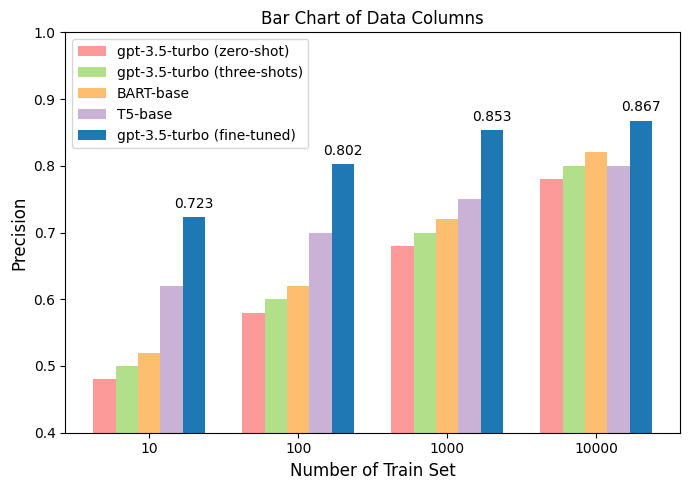

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = [
    [0.48, 0.58, 0.68, 0.78],
    [0.5, 0.6, 0.7, 0.8],
    [0.52, 0.62, 0.72, 0.82],
    [0.62, 0.7, 0.75, 0.8],
    [0.723, 0.802, 0.853, 0.867]
]

# labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
labels = ['gpt-3.5-turbo (zero-shot)', 'gpt-3.5-turbo (three-shots)', 'BART-base', 'T5-base', 'gpt-3.5-turbo (fine-tuned)']
colors = ['#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6',  '#1f78b4']


bar_width = 0.15
index = np.arange(len(data[0]))

plt.figure(figsize=(7, 5))
for i, (d, label, color) in enumerate(zip(data, labels, colors)):
    bars = plt.bar(index + i * bar_width, d, bar_width, label=label, color=color)
    
    # 仅在最后一列（Column 5）上添加数据标签
    if i == len(data) - 1:  
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# 添加标题和标签
plt.title("Bar Chart of Data Columns")
plt.xlabel("Number of Train Set", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.ylim(0.4, 1)
plt.xticks(index + bar_width*2, ['10', '100', '1000', '10000'])

# 设置图例位置为右上角
plt.legend(loc="upper left")

# 显示图形
plt.tight_layout()
plt.show()


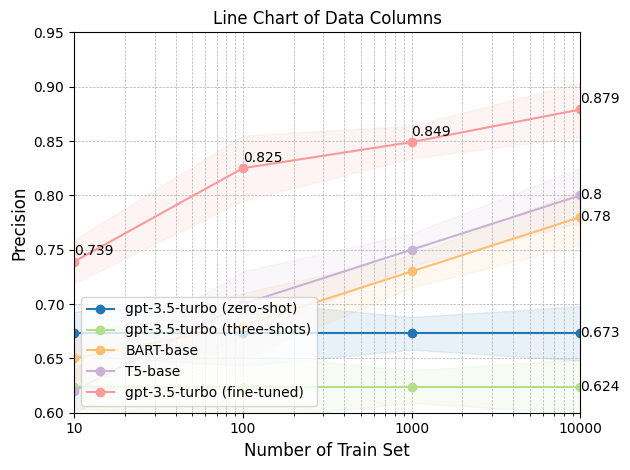

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据

## 胡编的data
# data = [
#     [0.48, 0.48, 0.48, 0.48],
#     [0.55, 0.55, 0.55, 0.55],
#     [0.65, 0.68, 0.73, 0.78],
#     [0.62, 0.7, 0.75, 0.8],
#     [0.72, 0.8, 0.853, 0.867]
# ]

data = [
    [0.673, 0.673, 0.673, 0.673],      # 'gpt-3.5-turbo (zero-shot)'
    [0.624, 0.624, 0.624, 0.624],      # 'gpt-3.5-turbo (three-shots)'
    [0.65, 0.68, 0.73, 0.78],           # 'BART-base',
    [0.62, 0.7, 0.75, 0.8],             # 'T5-base',
    [0.739, 0.825, 0.849, 0.879]      # 'gpt-3.5-turbo (fine-tuned)'
]


labels = ['gpt-3.5-turbo (zero-shot)', 'gpt-3.5-turbo (three-shots)', 'BART-base', 'T5-base', 'gpt-3.5-turbo (fine-tuned)']
colors = ['#1f78b4', '#b2df8a', '#fdbf6f', '#cab2d6' ,'#fb9a99', ]

index = [10, 100, 1000, 10000]  # log scale

# 假设为"Column 5"的数据定义一个误差值
errors = [0.02, 0.03, 0.015, 0.025]

# 为每一列数据绘制一条折线
for i, (d, label, color) in enumerate(zip(data, labels, colors)):
    plt.plot(index, d, marker='o', label=label, color=color, linestyle='-')
    plt.fill_between(index, [val-error for val, error in zip(d, errors)], [val+error for val, error in zip(d, errors)], color=color, alpha=0.1)
    if label == 'gpt-3.5-turbo (fine-tuned)':   
        for x, y in zip(index, d):
            plt.text(x+0.06, y+0.003, str(y), ha='left', va='bottom', fontsize=10)
    else:
        plt.text(index[-1]+0.06, d[-1], str(d[-1]), ha='left', va='center', fontsize=10)

        
# 添加标题、标签、图例等
plt.title("Line Chart of Data Columns")
plt.xlabel("Number of Train Set", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.xlim(10, 10000)
plt.ylim(0.6, 0.95)
# 设置对数刻度
plt.xscale('log')
plt.xticks(index, index)  
plt.legend(loc="lower left")


# 显示图形
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
plt.show()


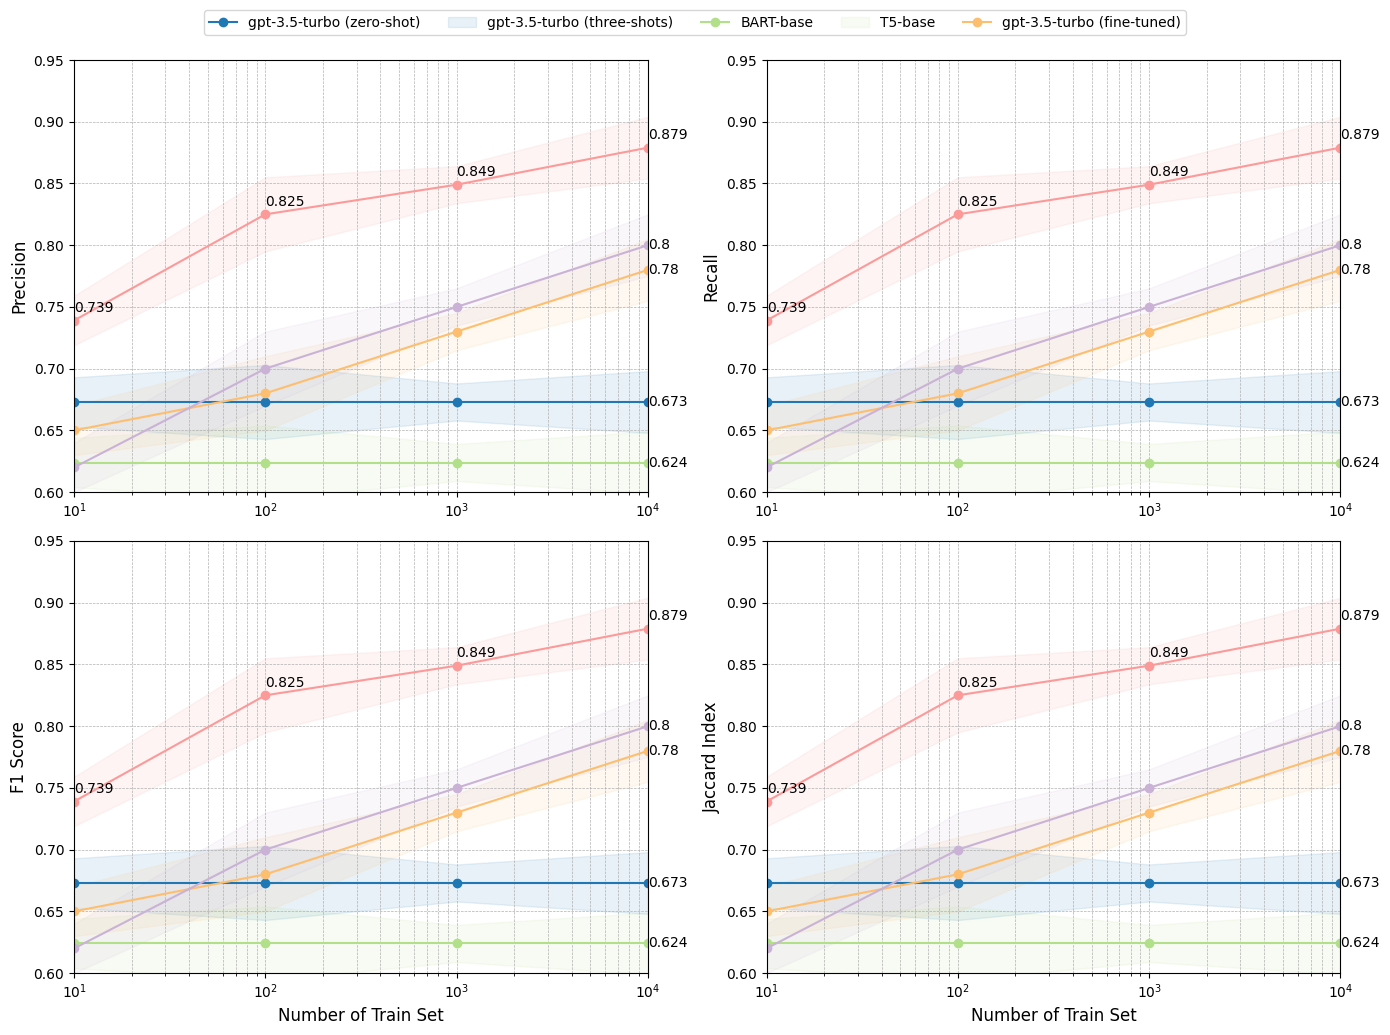

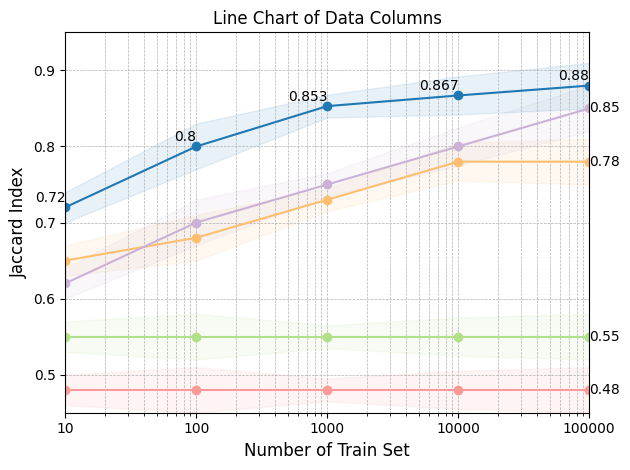

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = [
    [0.48, 0.48, 0.48, 0.48, 0.48],
    [0.55, 0.55, 0.55, 0.55, 0.55],
    [0.65, 0.68, 0.73, 0.78, 0.78],
    [0.62, 0.7, 0.75, 0.8, 0.85],
    [0.72, 0.8, 0.853, 0.867, 0.88]
]

labels = ['gpt-3.5-turbo (zero-shot)', 'gpt-3.5-turbo (three-shots)', 'BART-base', 'T5-base', 'gpt-3.5-turbo (fine-tuned)']
colors = ['#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6',  '#1f78b4']

index = [10, 100, 1000, 10000, 100000]  # log scale

# 假设为"Column 5"的数据定义一个误差值
errors = [0.02, 0.03, 0.015, 0.025, 0.03]

# 为每一列数据绘制一条折线
for i, (d, label, color) in enumerate(zip(data, labels, colors)):
    plt.plot(index, d, marker='o', label=label, color=color, linestyle='-')
    plt.fill_between(index, [val-error for val, error in zip(d, errors)], [val+error for val, error in zip(d, errors)], color=color, alpha=0.1)
    if label == 'gpt-3.5-turbo (fine-tuned)':   
        for x, y in zip(index, d):
            plt.text(x+0.1, y+0.003, str(y), ha='right', va='bottom', fontsize=10)
    else:
        plt.text(index[-1]+0.06, d[-1], str(d[-1]), ha='left', va='center', fontsize=10)

        
# 添加标题、标签、图例等
plt.title("Line Chart of Data Columns")
plt.xlabel("Number of Train Set", fontsize=12)
plt.ylabel("Jaccard Index", fontsize=12)
plt.xlim(10, 10000)
plt.ylim(0.45, 0.95)
# 设置对数刻度
plt.xscale('log')
plt.xticks(index, index)  
# 绘制图例
# plt.legend(loc="lower left")
# 将图例绘制为一行并放在图形框下方
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels))


# 显示图形
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
plt.show()


C:\Users\zw\AppData\Local\Temp\ipykernel_39264\3854801397.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


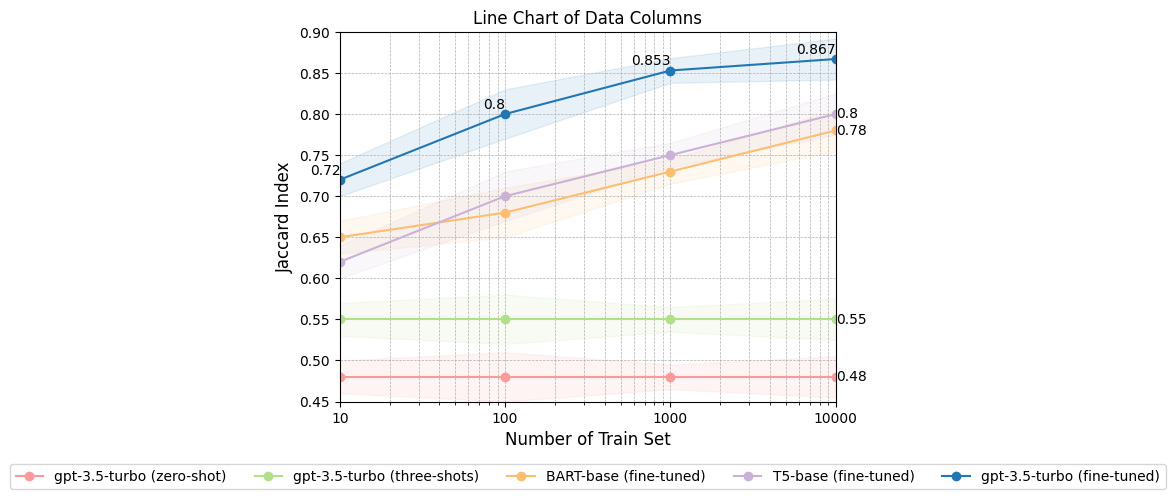

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = [
    [0.48, 0.48, 0.48, 0.48],
    [0.55, 0.55, 0.55, 0.55],
    [0.65, 0.68, 0.73, 0.78],
    [0.62, 0.7, 0.75, 0.8],
    [0.72, 0.8, 0.853, 0.867]
]

labels = ['gpt-3.5-turbo (zero-shot)', 'gpt-3.5-turbo (three-shots)', 'BART-base (fine-tuned)', 'T5-base (fine-tuned)', 'gpt-3.5-turbo (fine-tuned)']
colors = ['#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6',  '#1f78b4']

index = [10, 100, 1000, 10000]  # log scale

# 假设为"Column 5"的数据定义一个误差值
errors = [0.02, 0.03, 0.015, 0.025]

# 为每一列数据绘制一条折线
for i, (d, label, color) in enumerate(zip(data, labels, colors)):
    plt.plot(index, d, marker='o', label=label, color=color, linestyle='-')
    plt.fill_between(index, [val-error for val, error in zip(d, errors)], [val+error for val, error in zip(d, errors)], color=color, alpha=0.1)
    if label == 'gpt-3.5-turbo (fine-tuned)':   
        for x, y in zip(index, d):
            plt.text(x+0.1, y+0.003, str(y), ha='right', va='bottom', fontsize=10)
    else:
        plt.text(index[-1]+0.06, d[-1], str(d[-1]), ha='left', va='center', fontsize=10)

        
# 添加标题、标签、图例等
plt.title("Line Chart of Data Columns")
plt.xlabel("Number of Train Set", fontsize=12)
plt.ylabel("Jaccard Index", fontsize=12)
plt.xlim(10, 10000)
plt.ylim(0.45, 0.9)
# 设置对数刻度
plt.xscale('log')
plt.xticks(index, index)  
# 绘制图例
# plt.legend(loc="lower left")
# 将图例绘制为一行并放在图形框下方
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels))


# 显示图形
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
plt.show()
